<img SRC="img01.webp"/>
<center><h1 style="color:#E9967A">Analisis de datos</h1></center>
<center><h4 style="color:#000000">Universidad Castro Carazo</h4></center>
<center><h6 style="color:#000000">II Cuatrimestre 2022</h6></center>
</br>
</br>
<p style="text-align: justify">La empresa de vehiculos usados, desea conocer cual es la distribucion y costo de los autos que tienen actualmente en inventario para la venta.
La pregunta de negocio por responder es: ¿Cual estrategia podria implementar para generar una mayor rotacion de inventario?</p>

<p style="text-align: justify">El objetivo principal, es poder proponer una estrategia de ventas de carros en funcion de los disponibles en el lote actual.</p>

<p>La fuente para cambiar los colores del texto es: </p> <a href="https://www.w3schools.com/cssref/css_colors.asp">w3school</a>


 

<h2 style="color:#E9967A"> 1.Carga de datos y estandarizacion de los archivos de datos </h2>

<p> Que se hace en este apartado?</p>

<ol>
    <li>Importar las librerias a utilizar</li>
    <li>Importar los set de datos (xlsx,csv,txt,sql)</li>
    <li>Revision de los nombre de las columnas del set de datos</li>
    <li>si tenemos mas de un archivo vamos a unirlos en un unico dataframe</li>
</ol>

<h5 Style="color:#8A2BE2">1.1 Importar las librerias a utilizar</h5>



In [83]:
#Se realiza la importacion de las librerias necesarias para el ejercio de analisis de datos sobre los autos disponibles en el lote de ventas.
import pandas as pd              #para el manejo de los datos DataFrame
import numpy as np               #para el manejo de estructuras de datos Listas

import matplotlib.pyplot as plt  #para la creacion de los graficos.


<h5 Style="color:#8A2BE2">1.2 Importar el set de datos </h5>

<p>La fuente de los datos es la pagina denominada Machine Learning Repository, en esta se puede obtener el nombre de los encabezados del set de datos</p>
<a href="https://archive.ics.uci.edu/ml/datasets/Automobile"> Fuente de datos</a>
   

In [84]:
#Se crea una lista con los nombres de las columnas 
cols = ["symboling", "normalized", "make", "fuel", "aspiration", "doors",
"style", "wheels", "engine", "base", "length", "width", "heingt",
"curb", "engineType", "Cylinders", "engine-size", "system", "bore", "stroke",
"compression", "horsepower", "peak", "City", "Higway", "price"]

#se cargan los set de datos en la memoria de la PC.
df_Autos1 = pd.read_csv("autos1.csv", names = cols)
df_Autos2 = pd.read_csv("autos.csv", names = cols)

Este conando me da las dimensiones del set de datos en filas y columnas

In [3]:
df_Autos2.shape

(197, 26)

In [4]:
df_Autos1.shape 

(97, 26)

<h5 Style="color:#8A2BE2">1.3 Revision de las columnas</h5>
Este comando permite consultar los nombres de las columnas 

In [5]:
df_Autos2.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

<h5 Style="color:#8A2BE2">Revision y validacion de las variables</h5>
<p>Este proceso de revision permite identificar variables o datos que deben ser analizados de manera independiente ya que no concuerdan con los rangos de informacion a contar.</p>

<p Style="color:#8B008B">Se requiere como insumo disponer de los Meta Datos</p>

In [6]:
df_Autos1.tail(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
87,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,68,4500,37,42,9495
88,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995
89,3,?,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595
90,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980
91,0,?,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295
92,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
93,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
94,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
95,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
96,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [7]:
df_Autos1.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [8]:
df_Autos1.head(15)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
5,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
6,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
7,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900
8,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95,4150,28,33,13200
9,0,?,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440


In [9]:
df_Autos1.describe()

,symboling,base,length,width,heingt,curb,engine-size,bore,stroke,compression,City,Higway
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,0.855670,98.823711,175.208247,65.872165,54.194845,2587.175258,125.432990,3.388969,3.169381,10.570206,25.185567,30.814433
std,1.314896,5.332170,10.064062,1.655719,2.416755,412.305914,29.560992,0.264412,0.352691,4.373831,5.470241,5.784912
min,-2.000000,89.500000,156.900000,63.400000,49.700000,1918.000000,90.000000,2.540000,2.070000,7.000000,17.000000,22.000000
25%,0.000000,95.700000,168.900000,64.400000,52.500000,2261.000000,98.000000,3.190000,3.030000,9.000000,20.000000,25.000000
50%,0.000000,97.300000,173.500000,65.600000,54.500000,2535.000000,120.000000,3.430000,3.230000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,183.500000,66.600000,56.000000,2975.000000,146.000000,3.620000,3.400000,9.400000,28.000000,34.000000
max,3.000000,114.200000,198.900000,72.300000,59.800000,3485.000000,203.000000,3.940000,3.900000,23.000000,38.000000,47.000000


In [10]:
df_Autos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    97 non-null     int64  
 1   normalized   97 non-null     object 
 2   make         97 non-null     object 
 3   fuel         97 non-null     object 
 4   aspiration   97 non-null     object 
 5   doors        97 non-null     object 
 6   style        97 non-null     object 
 7   wheels       97 non-null     object 
 8   engine       97 non-null     object 
 9   base         97 non-null     float64
 10  length       97 non-null     float64
 11  width        97 non-null     float64
 12  heingt       97 non-null     float64
 13  curb         97 non-null     int64  
 14  engineType   97 non-null     object 
 15  Cylinders    97 non-null     object 
 16  engine-size  97 non-null     int64  
 17  system       97 non-null     object 
 18  bore         97 non-null     float64
 19  stroke    

<h5 Style="color:#8A2BE2">1.4 Unir los Set de Datos</h5>

In [11]:
#df_Autos1-97 Observaciones y 26 columnas 
#df_Autos2-197 Observaciones y 26 columnas 

unionArchivos = (df_Autos1, df_Autos2)
df_Autos = pd.concat(unionArchivos)
df_Autos.shape

(294, 26)

<h5 Style="color:#8A2BE2">2. Manejo de valores faltantes</h5>

<p Style="color:#8B008B"> Que se hace en este apartado?</p>

<ol>
    <li>Identificar como se muestran los valores faltantes y estandarizarlos a  NaN</li>
    <li>Contar la cantidad de valores NaN (faltantes)</li>
    <li>Analisis para imputar los valores numericos con la media</li>
    <li>Analisis para imputar los valores caracter con el mas frecuente</li>
    <li>Eliminar filas con valores faltantes</li>
    
</ol>

<h5 Style="color:#00BFFF">2.1 Identificar como se muestran los valores faltantes y estandarizarlos a NaN</h5>

In [12]:
df_Autos1.describe()

,symboling,base,length,width,heingt,curb,engine-size,bore,stroke,compression,City,Higway
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,0.855670,98.823711,175.208247,65.872165,54.194845,2587.175258,125.432990,3.388969,3.169381,10.570206,25.185567,30.814433
std,1.314896,5.332170,10.064062,1.655719,2.416755,412.305914,29.560992,0.264412,0.352691,4.373831,5.470241,5.784912
min,-2.000000,89.500000,156.900000,63.400000,49.700000,1918.000000,90.000000,2.540000,2.070000,7.000000,17.000000,22.000000
25%,0.000000,95.700000,168.900000,64.400000,52.500000,2261.000000,98.000000,3.190000,3.030000,9.000000,20.000000,25.000000
50%,0.000000,97.300000,173.500000,65.600000,54.500000,2535.000000,120.000000,3.430000,3.230000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,183.500000,66.600000,56.000000,2975.000000,146.000000,3.620000,3.400000,9.400000,28.000000,34.000000
max,3.000000,114.200000,198.900000,72.300000,59.800000,3485.000000,203.000000,3.940000,3.900000,23.000000,38.000000,47.000000


In [13]:
df_Autos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    97 non-null     int64  
 1   normalized   97 non-null     object 
 2   make         97 non-null     object 
 3   fuel         97 non-null     object 
 4   aspiration   97 non-null     object 
 5   doors        97 non-null     object 
 6   style        97 non-null     object 
 7   wheels       97 non-null     object 
 8   engine       97 non-null     object 
 9   base         97 non-null     float64
 10  length       97 non-null     float64
 11  width        97 non-null     float64
 12  heingt       97 non-null     float64
 13  curb         97 non-null     int64  
 14  engineType   97 non-null     object 
 15  Cylinders    97 non-null     object 
 16  engine-size  97 non-null     int64  
 17  system       97 non-null     object 
 18  bore         97 non-null     float64
 19  stroke    

In [14]:
df_Autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
5,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
6,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
7,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900
8,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
9,0,?,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440


Valores Faltantes NaN (estandar internacional), "", null, ?, entre otros.


In [15]:
df_Autos.replace("?", np.nan, inplace=True)
df_Autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
5,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
6,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
7,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900
8,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
9,0,NaN,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440


<h5 Style="color:#8A2BE2">2.2 Contar la cantidad de valores NaN (faltantes)</h5>

In [16]:
valoresPerdidos = df_Autos.isnull()
valoresPerdidos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
for column in valoresPerdidos.columns.values.tolist():
    print(column)
    print(valoresPerdidos[column].value_counts())
    print("")

symboling
False    294
Name: symboling, dtype: int64

normalized
False    237
True      57
Name: normalized, dtype: int64

make
False    294
Name: make, dtype: int64

fuel
False    294
Name: fuel, dtype: int64

aspiration
False    294
Name: aspiration, dtype: int64

doors
False    292
True       2
Name: doors, dtype: int64

style
False    294
Name: style, dtype: int64

wheels
False    294
Name: wheels, dtype: int64

engine
False    294
Name: engine, dtype: int64

base
False    294
Name: base, dtype: int64

length
False    294
Name: length, dtype: int64

width
False    294
Name: width, dtype: int64

heingt
False    294
Name: heingt, dtype: int64

curb
False    294
Name: curb, dtype: int64

engineType
False    294
Name: engineType, dtype: int64

Cylinders
False    294
Name: Cylinders, dtype: int64

engine-size
False    294
Name: engine-size, dtype: int64

system
False    294
Name: system, dtype: int64

bore
False    290
True       4
Name: bore, dtype: int64

stroke
False    290
True     

<h5 Style="color:#8A2BE2">2.3 Analisis para imputar los valores numericos con la media</h5>

In [18]:
avg_norm = df_Autos["normalized"].astype("float").mean(axis=0)
print("La media de normalized es:", avg_norm)

La media de normalized es: 122.26160337552743


In [19]:
df_Autos["peak"].replace(np.nan, 5088, inplace=True)
df_Autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
5,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
6,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399
7,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900
8,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
9,0,NaN,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440


<h5 Style="color:#8A2BE2">2.4 Analisis para imputar los valores caracter con el mas frecuente</h5>

In [20]:
df_Autos["doors"].value_counts()

four    167
two     125
Name: doors, dtype: int64

In [21]:
df_Autos["doors"].value_counts().idxmax()

'four'

In [22]:
df_Autos["doors"].replace(np.nan, "four", inplace=True)

In [23]:
valoresPerdidos = df_Autos.isnull()
for column in valoresPerdidos.columns.values.tolist():
    print(column)
    print(valoresPerdidos[column].value_counts())
    print("")
    

symboling
False    294
Name: symboling, dtype: int64

normalized
False    237
True      57
Name: normalized, dtype: int64

make
False    294
Name: make, dtype: int64

fuel
False    294
Name: fuel, dtype: int64

aspiration
False    294
Name: aspiration, dtype: int64

doors
False    294
Name: doors, dtype: int64

style
False    294
Name: style, dtype: int64

wheels
False    294
Name: wheels, dtype: int64

engine
False    294
Name: engine, dtype: int64

base
False    294
Name: base, dtype: int64

length
False    294
Name: length, dtype: int64

width
False    294
Name: width, dtype: int64

heingt
False    294
Name: heingt, dtype: int64

curb
False    294
Name: curb, dtype: int64

engineType
False    294
Name: engineType, dtype: int64

Cylinders
False    294
Name: Cylinders, dtype: int64

engine-size
False    294
Name: engine-size, dtype: int64

system
False    294
Name: system, dtype: int64

bore
False    290
True       4
Name: bore, dtype: int64

stroke
False    290
True       4
Name: str

<h5 Style="color:#8A2BE2">2.5 Eliminar valores faltantes</h5>

In [24]:
df_Autos.dropna(subset = ("price"), axis=0, inplace=True)
df_Autos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,NaN,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,NaN,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


In [25]:
df_Autos.reset_index(drop=True, inplace=True)
df_Autos 

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0,NaN,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
285,0,NaN,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
286,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
287,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


<h2 style="color:#E9967A"> 3.Estandarizacion de los datos </h2>

<p> Que se hace en este apartado?</p>

<ol>
    <li>Se verifica el dominio de la variable y se ajusta si es necesario</li>
    <li>Se convierten los valores en funcion de su interpretación</li>
    <li>Se normalizan los datos para que los valores distintos queden entre 0 y 1</li>
    <li>Binning</li>
</ol>

<h5 Style="color:#00BFFF">3.1 Verificacion del dominio de variables</h5>

In [26]:
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199


In [27]:
df_Autos.dtypes

symboling        int64
normalized      object
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engine-size      int64
system          object
bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [28]:
##Esto se realiza para poder estandarizar los tipos de datos del negocio, no es necesario hacerlo siempre, es por
##el ejemplo didactico.
df_Autos.dropna(subset = ("horsepower"), axis=0, inplace=True)
df_Autos.dropna(subset = ("normalized"), axis=0, inplace=True)
df_Autos.reset_index(drop=True, inplace=True)

df_Autos[['bore', 'stroke', 'peak']] = df_Autos[['bore', 'stroke', 'peak']].astype('float')
df_Autos[['price']] = df_Autos[['price']].astype('float')
df_Autos[['normalized']] = df_Autos[['normalized']].astype('int')
df_Autos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engine-size      int64
system          object
bore           float64
stroke         float64
compression    float64
horsepower      object
peak           float64
City             int64
Higway           int64
price          float64
dtype: object

In [29]:
df_Autos["City-L/100km"] = 235/df_Autos["City"]
df_Autos["Higway-L/100km"] = 235/df_Autos["Higway"]   
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,City-L/100km,Higway-L/100km
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,3.33,3.47,8.5,97,5200.0,27,34,9549.0,8.703704,6.911765
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.43,3.27,9.0,152,5200.0,17,22,13499.0,13.823529,10.681818
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,3.43,3.27,9.0,152,5200.0,17,22,14399.0,13.823529,10.681818
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.43,3.27,9.0,152,5200.0,19,25,13499.0,12.368421,9.400000
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,3.43,3.27,9.0,160,5200.0,19,25,17199.0,12.368421,9.400000


<h5 style="color:#E9967A"> 3.3 Normalizar Valores</h5>

In [30]:
dftemp = df_Autos[['length', 'width', 'heingt']]
dftemp

,length,width,heingt
0,173.4,65.2,54.7
1,181.7,66.5,55.1
2,184.6,66.5,56.1
3,184.6,66.5,55.1
4,170.7,67.9,49.7
...,...,...,...
232,171.7,65.5,55.7
233,165.7,64.0,51.4
234,188.8,67.2,56.2
235,188.8,67.2,57.5


In [31]:
df_Autos["length"] = df_Autos['length']/df_Autos['length'].max()
df_Autos["width"] = df_Autos['width']/df_Autos['width'].max()
df_Autos["heingt"] = df_Autos['heingt']/df_Autos['heingt'].max()

In [32]:
dftemp = df_Autos[['length', 'width', 'heingt']]
dftemp

,length,width,heingt
0,0.855874,0.909344,0.914716
1,0.896841,0.927476,0.921405
2,0.911155,0.927476,0.938127
3,0.911155,0.927476,0.921405
4,0.842547,0.947001,0.831104
...,...,...,...
232,0.847483,0.913529,0.931438
233,0.817868,0.892608,0.859532
234,0.931885,0.937238,0.939799
235,0.931885,0.937238,0.961538


<h5 style="color:#E9967A"> 3.3 Binning</h5>

In [33]:
df_Autos 

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,City-L/100km,Higway-L/100km
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,3.33,3.47,8.5,97,5200.0,27,34,9549.0,8.703704,6.911765
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.43,3.27,9.0,152,5200.0,17,22,13499.0,13.823529,10.681818
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,3.43,3.27,9.0,152,5200.0,17,22,14399.0,13.823529,10.681818
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.43,3.27,9.0,152,5200.0,19,25,13499.0,12.368421,9.400000
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,3.43,3.27,9.0,160,5200.0,19,25,17199.0,12.368421,9.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,3.19,3.40,10.0,100,5500.0,26,32,9995.0,9.038462,7.343750
233,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,3.19,3.40,8.5,90,5500.0,24,29,9980.0,9.791667,8.103448
234,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,3.78,3.15,9.5,114,5400.0,23,28,12940.0,10.217391,8.392857
235,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,3.78,3.15,9.5,114,5400.0,23,28,13415.0,10.217391,8.392857


In [34]:
df_Autos.dtypes

symboling           int64
normalized          int32
make               object
fuel               object
aspiration         object
doors              object
style              object
wheels             object
engine             object
base              float64
length            float64
width             float64
heingt            float64
curb                int64
engineType         object
Cylinders          object
engine-size         int64
system             object
bore              float64
stroke            float64
compression       float64
horsepower         object
peak              float64
City                int64
Higway              int64
price             float64
City-L/100km      float64
Higway-L/100km    float64
dtype: object

In [35]:
df_Autos[['horsepower']] = df_Autos[['horsepower']].astype('int')

In [36]:
df_Autos.dtypes

symboling           int64
normalized          int32
make               object
fuel               object
aspiration         object
doors              object
style              object
wheels             object
engine             object
base              float64
length            float64
width             float64
heingt            float64
curb                int64
engineType         object
Cylinders          object
engine-size         int64
system             object
bore              float64
stroke            float64
compression       float64
horsepower          int32
peak              float64
City                int64
Higway              int64
price             float64
City-L/100km      float64
Higway-L/100km    float64
dtype: object

In [37]:
bins = np.linspace(min(df_Autos["horsepower"]), max(df_Autos["horsepower"]), 4)
bins

array([ 48.        ,  98.66666667, 149.33333333, 200.        ])

In [38]:
nombre = ["pequeño","mediano","grande"]
df_Autos["horsepower-bins"] =pd.cut(df_Autos["horsepower"], bins, labels=nombre, include_lowest=True)
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,stroke,compression,horsepower,peak,City,Higway,price,City-L/100km,Higway-L/100km,horsepower-bins
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,3.47,8.5,97,5200.0,27,34,9549.0,8.703704,6.911765,pequeño
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.27,9.0,152,5200.0,17,22,13499.0,13.823529,10.681818,grande
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,3.27,9.0,152,5200.0,17,22,14399.0,13.823529,10.681818,grande
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.27,9.0,152,5200.0,19,25,13499.0,12.368421,9.400000,grande
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,3.27,9.0,160,5200.0,19,25,17199.0,12.368421,9.400000,grande


In [39]:
df_Autos[["horsepower","horsepower-bins"]].head(10)

,horsepower,horsepower-bins
0,97,pequeño
1,152,grande
2,152,grande
3,152,grande
4,160,grande
5,200,grande
6,160,grande
7,97,pequeño
8,95,pequeño
9,95,pequeño


In [40]:
df_Autos[["horsepower-bins"]].value_counts()

horsepower-bins
pequeño            145
mediano             68
grande              24
dtype: int64

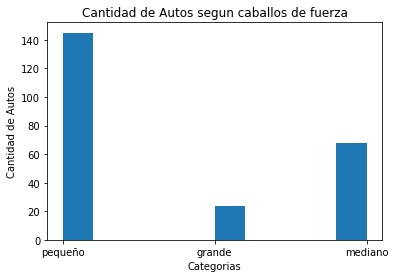

In [41]:
plt.hist(df_Autos["horsepower-bins"])
plt.xlabel("Categorias")
plt.ylabel("Cantidad de Autos")
plt.title("Cantidad de Autos segun caballos de fuerza")
plt.show()

In [42]:
df_Autos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,stroke,compression,horsepower,peak,City,Higway,price,City-L/100km,Higway-L/100km,horsepower-bins
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,3.47,8.5,97,5200.0,27,34,9549.0,8.703704,6.911765,pequeño
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.27,9.0,152,5200.0,17,22,13499.0,13.823529,10.681818,grande
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,3.27,9.0,152,5200.0,17,22,14399.0,13.823529,10.681818,grande
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.27,9.0,152,5200.0,19,25,13499.0,12.368421,9.400000,grande
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,3.27,9.0,160,5200.0,19,25,17199.0,12.368421,9.400000,grande
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,3.40,10.0,100,5500.0,26,32,9995.0,9.038462,7.343750,mediano
233,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,3.40,8.5,90,5500.0,24,29,9980.0,9.791667,8.103448,pequeño
234,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,3.15,9.5,114,5400.0,23,28,12940.0,10.217391,8.392857,mediano
235,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,3.15,9.5,114,5400.0,23,28,13415.0,10.217391,8.392857,mediano


<h2 style="color:#E9967A"> 4.Visualización de Datos </h2>

<p>En este apartado se vana crear diferentes visiualizaciones (Graficas), las cuales nos ayudan a realizar la interpretacion y analisis de la información del set</p>

<p>Estos son tres elementos fundamentales para poder crear las visualizaciones:
    
<ol>
    <li>Preguntas de negocio a responder</li>
    <li>Pleno conocimiento del set de datos</li>
    <li>Experiencia de negocio</li>
    
</ol>

In [43]:
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,stroke,compression,horsepower,peak,City,Higway,price,City-L/100km,Higway-L/100km,horsepower-bins
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,3.47,8.5,97,5200.0,27,34,9549.0,8.703704,6.911765,pequeño
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.27,9.0,152,5200.0,17,22,13499.0,13.823529,10.681818,grande
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,3.27,9.0,152,5200.0,17,22,14399.0,13.823529,10.681818,grande
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.27,9.0,152,5200.0,19,25,13499.0,12.368421,9.400000,grande
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,3.27,9.0,160,5200.0,19,25,17199.0,12.368421,9.400000,grande


In [44]:
#Agrupar las observaciones segun marca de vehiculo.
gf1 = df_Autos.groupby(["make"]).count()
gf1 = gf1.iloc[:,:1]
gf1 = gf1.rename(columns={'symboling':'Cantidad'})
gf1

,Cantidad
make,
audi,4
bmw,4
chevrolet,3
dodge,9
honda,13
jaguar,1
mazda,15
mercedes-benz,5
mitsubishi,10


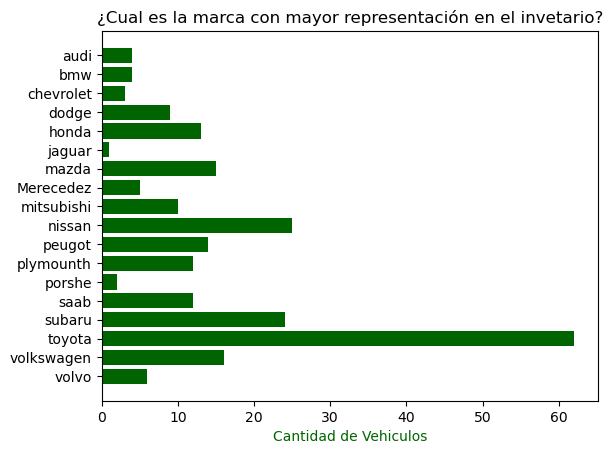

In [46]:
marcas = ("audi", "bmw","chevrolet", "dodge", "honda", "jaguar", "mazda", "Merecedez", "mitsubishi", "nissan", 
          "peugot", "plymounth", "porshe", "saab", "subaru", "toyota", "volkswagen", "volvo")

eje_y = gf1['Cantidad'].tolist()
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(marcas))
ax.barh(y_pos, eje_y, align='center',height=0.8, color= "#006400", alpha=1)
ax.set_yticks(y_pos, labels=marcas)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Cantidad de Vehiculos').set_color("#006400")
ax.set_title('¿Cual es la marca con mayor representación en el invetario?')
plt.show()

In [49]:
#Agrupar las observaciones según marca de vehiculo.
gf2 = df_Autos.groupby(['horsepower-bins']).count()
gf2 = gf2.iloc[:,:1]
gf2

,symboling
horsepower-bins,
pequeño,145
mediano,68
grande,24


Text(0, 0.5, 'Cantidad de vehiculos')

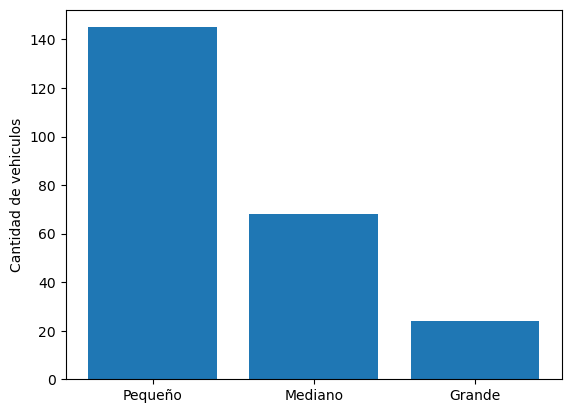

In [57]:
marcas = ("Pequeño", "Mediano","Grande")

eje_y = gf2['symboling'].tolist()

#Creamos la grafica 
plt.bar(marcas, eje_y)
plt.ylabel("Cantidad de vehiculos")

In [60]:
#Agrupar las observacione segun marca de vehiculo.
gf3 = df_Autos.groupby(['style']).count()
gf3 = gf3.iloc[:,:1]

#Codigo para ordenar los valores ascendente y desendente
#gf3 = gf3.sort_values('symboling') #Ordena de Mneor a Mayor
#gf3 = gf3.sort_values('symboling',ascending=False) #Ordena de Mayor a Menor
gf3

,symboling
style,
convertible,3
hardtop,8
hatchback,88
sedan,113
wagon,25


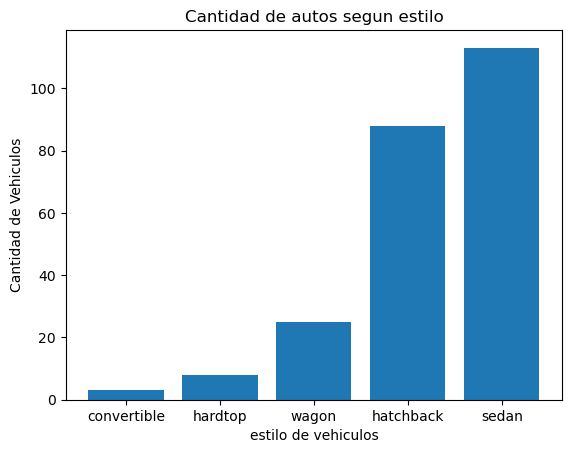

In [59]:
#Codigo para obtener la lista del indice del DataFrame
eje_x = gf3.index.tolist()

eje_y = gf3 ['symboling'].tolist()

#Creamos la grafica 
plt.bar(eje_x, eje_y)

#Leyenda del eje y
plt.ylabel("Cantidad de Vehiculos")

##Leyenda en el eje X
plt.xlabel("estilo de vehiculos")

##Titulo del Grafico
plt.title("Cantidad de autos segun estilo")

plt.show()

In [61]:
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,stroke,compression,horsepower,peak,City,Higway,price,City-L/100km,Higway-L/100km,horsepower-bins
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,3.47,8.5,97,5200.0,27,34,9549.0,8.703704,6.911765,pequeño
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.27,9.0,152,5200.0,17,22,13499.0,13.823529,10.681818,grande
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,3.27,9.0,152,5200.0,17,22,14399.0,13.823529,10.681818,grande
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.27,9.0,152,5200.0,19,25,13499.0,12.368421,9.400000,grande
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,3.27,9.0,160,5200.0,19,25,17199.0,12.368421,9.400000,grande


In [63]:
gf4 = df_Autos.groupby(['doors']).count()
gf4 = gf4.iloc[:,:1]
gf4

,symboling
doors,
four,140
two,97


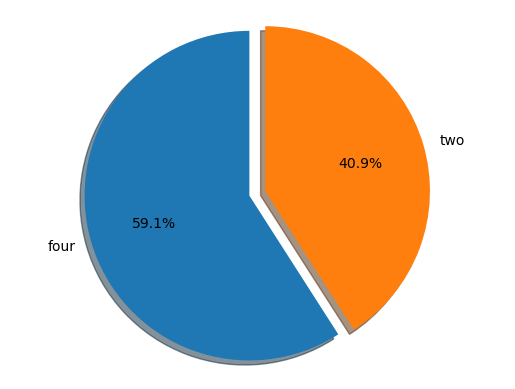

In [67]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
etiquetas = gf4.index.tolist()
sizes = gf4["symboling"].tolist()

separacion = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=separacion, labels=etiquetas, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [70]:
gf5 = df_Autos.groupby(['style']).count()
gf5 = gf5.iloc[:,:1]
gf5

,symboling
style,
convertible,3
hardtop,8
hatchback,88
sedan,113
wagon,25


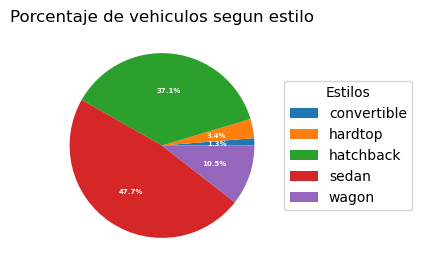

In [73]:
fig, ax = plt.subplots(figsize=(9, 3), subplot_kw=dict(aspect="equal"))

data = gf5['symboling'].tolist()
estilo = gf5.index.tolist()

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),textprops=dict(color="w"))

ax.legend(wedges, estilo,
          title="Estilos",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=5, weight="bold")

ax.set_title("Porcentaje de vehiculos segun estilo")

plt.show()

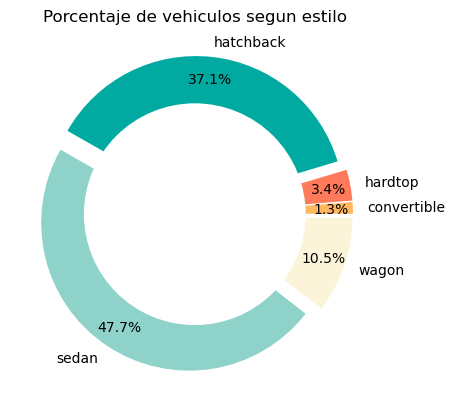

In [74]:
# Colores del grafico: FFB85F FF7A5A 00AAA0 8ED2C9 FCF4D9
colores = ['#FFB85F', '#FF7A5A', '#00AAA0', '#8ED2C9', '#FCF4D9']
#Separaciones
separacion = (0.07,0.07,0.07,0.07,0.07)
#Creacion graficca circular
plt.pie(data, explode=separacion, labels=estilo, autopct='%1.1f%%',pctdistance=0.85, colors=colores)

#Dibujar Circulo Blanco
circulo = plt.Circle((0,0), 0.75, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo)

plt.title("Porcentaje de vehiculos segun estilo")

plt.show()

In [79]:
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,stroke,compression,horsepower,peak,City,Higway,price,City-L/100km,Higway-L/100km,horsepower-bins
0,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,...,3.47,8.5,97,5200.0,27,34,9549.0,8.703704,6.911765,pequeño
1,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.27,9.0,152,5200.0,17,22,13499.0,13.823529,10.681818,grande
2,0,108,nissan,gas,std,four,wagon,fwd,front,100.4,...,3.27,9.0,152,5200.0,17,22,14399.0,13.823529,10.681818,grande
3,0,108,nissan,gas,std,four,sedan,fwd,front,100.4,...,3.27,9.0,152,5200.0,19,25,13499.0,12.368421,9.400000,grande
4,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,...,3.27,9.0,160,5200.0,19,25,17199.0,12.368421,9.400000,grande


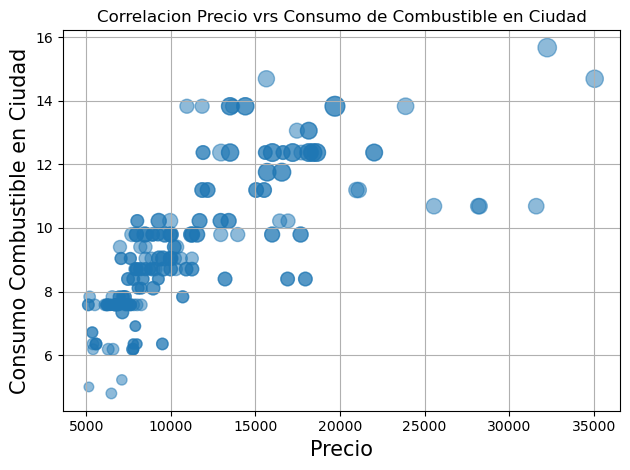

In [81]:
import matplotlib.cbook as cbook

fig, ax = plt.subplots()
ax.scatter(df_Autos['price'], df_Autos['City-L/100km'],s=df_Autos['horsepower'], alpha=0.5)
#ax.scatter(df_Autos['price'], df_Autos['horsepower-bins'],alpha=0.5)
ax.set_xlabel("Precio", fontsize=15)
ax.set_ylabel("Consumo Combustible en Ciudad", fontsize=15)
ax.set_title('Correlacion Precio vrs Consumo de Combustible en Ciudad')

ax.grid(True)
fig.tight_layout()

plt.show()